# Pasos previos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./Churn_Modelling.csv', index_col=0)

In [4]:
df.reset_index(drop=True, inplace=True)

In [5]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
len(df[(df.Balance == 0) & (df.Exited == 0)])

3117

<AxesSubplot:xlabel='Exited', ylabel='count'>

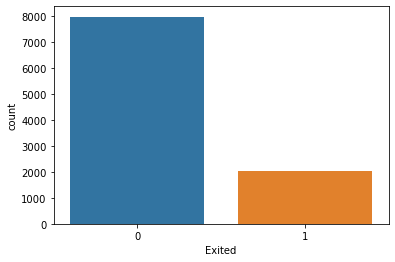

In [12]:
sns.countplot(df.Exited)

In [13]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


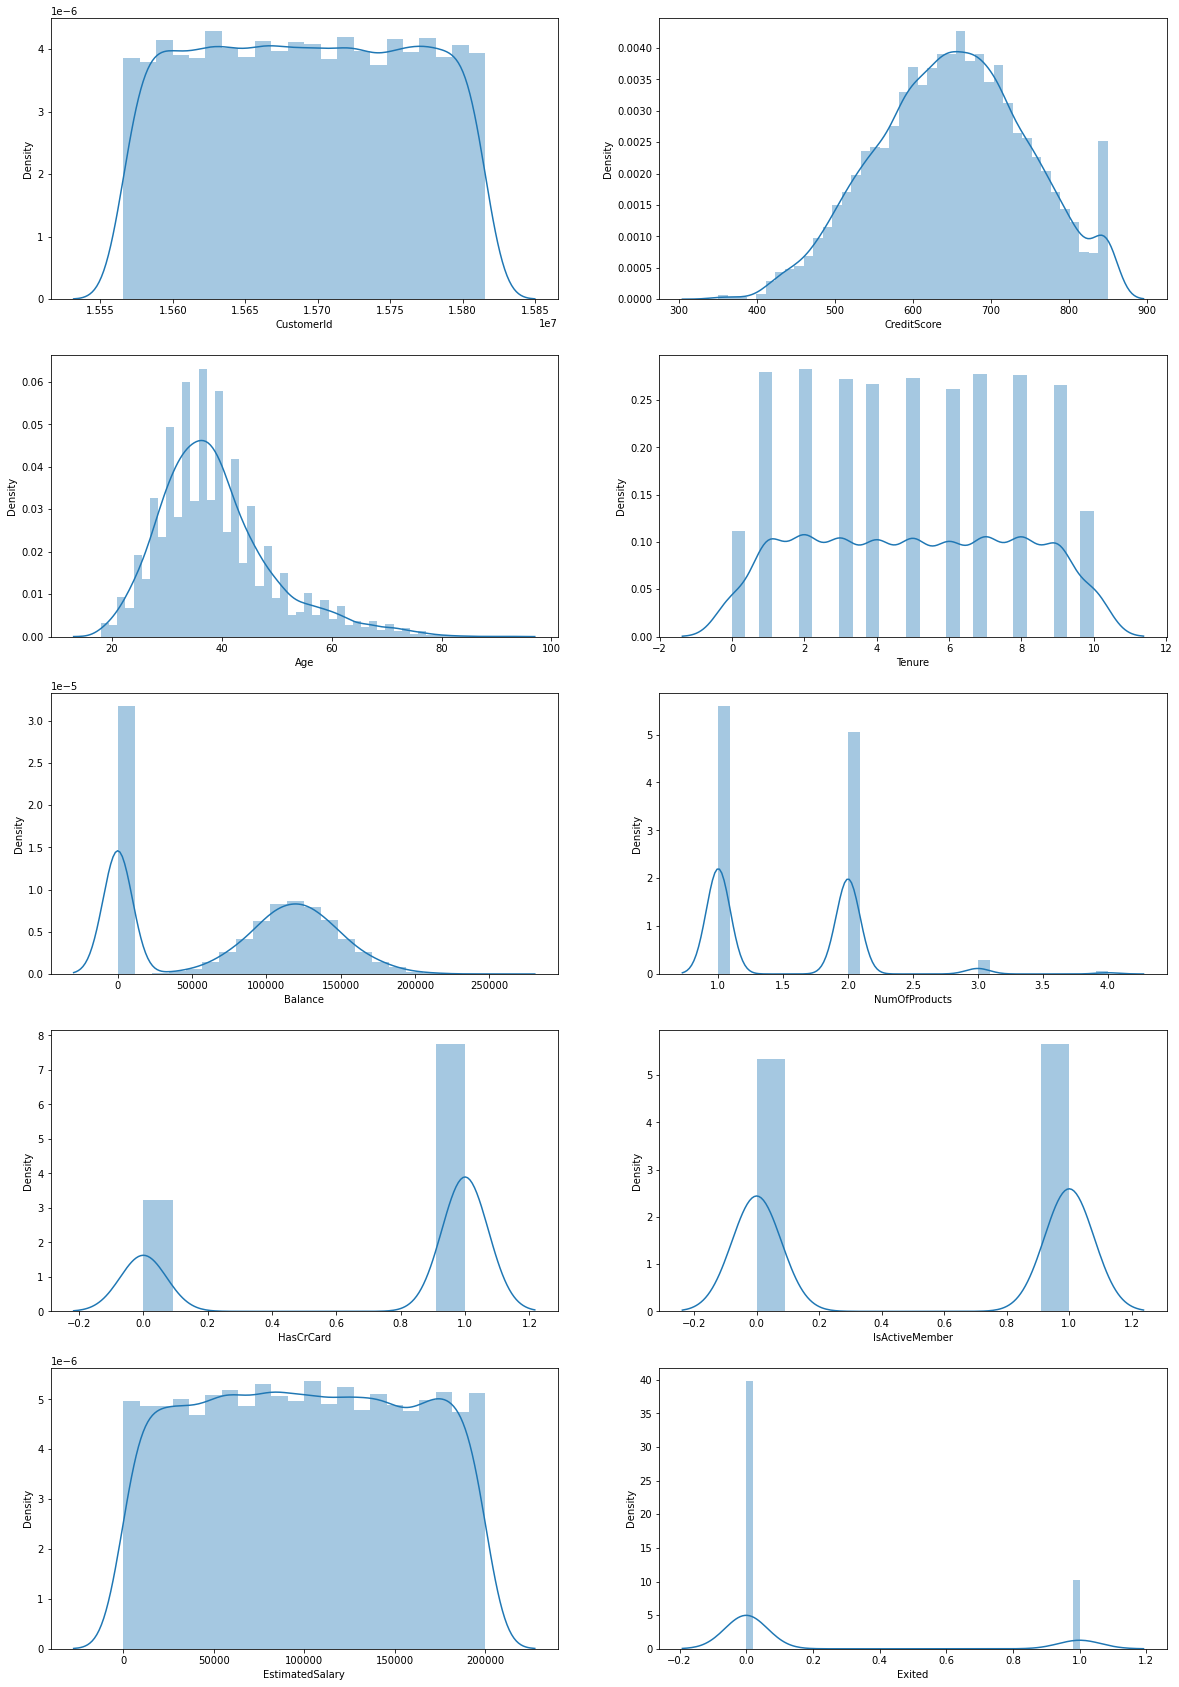

In [14]:
fig, ax = plt.subplots(5,2, figsize=(20,30))
var = df.select_dtypes(include='number').columns.to_list()

for i in range(5):
    for j in range(2):
        x = var.pop(0) # Con .pop() extrae el primer valor de la lista y nos ahorramos otra iteración
        sns.distplot(df[x], ax=ax[i][j])

In [15]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [16]:
df = pd.get_dummies(df, drop_first=True)

In [17]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [18]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


In [19]:
plt.rcParams['figure.figsize'] = (12,8)

<AxesSubplot:>

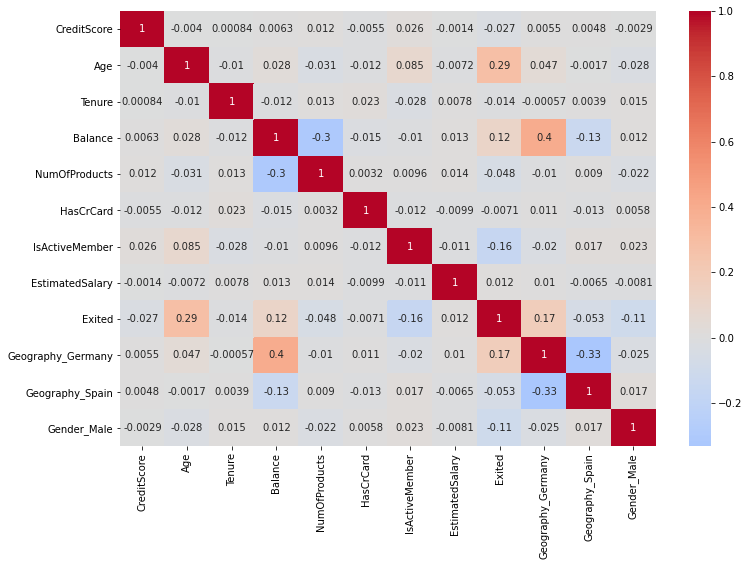

In [20]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)

In [21]:
# Reordenamos las columnas para que quede 'Exited' al final:

df = df[['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Male',
   'Exited']]

In [22]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,619,42,2,0.00,1,1,1,101348.88,0,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0


In [23]:
df[df['CreditScore']<0]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited


In [24]:
# sns.pairplot(data=df, hue= 'Exited')

# Logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve

In [27]:
def logreg(X,y,test_size=0.3):
    """
    Ejecuta un modelo logistic regression a partir de una X y una variable objetivo y.
    Se le puede inputar el test_size, que inicialmente será 0.3
    Imprime la classification report.
    """
    X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(classification_report(y_test, y_pred))

## Primera prueba 'naive'

In [28]:
# Le metemos la X,y sin preprocesar para una simple prueba

X = df.drop('Exited', axis=1)
y = df.Exited

In [29]:
logreg(X,y)

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      2416
           1       0.44      0.08      0.14       584

    accuracy                           0.80      3000
   macro avg       0.63      0.53      0.51      3000
weighted avg       0.74      0.80      0.74      3000



## Preprocesado: escalado de datos

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [31]:
# Creamos una nueva función añadiendo un escalado

def logregscaled(X,y,test_size=0.3, scaler=StandardScaler()):
    """
    Ejecuta un modelo logistic regression a partir de una X y una variable objetivo y.
    Se le puede inputar el test_size, que inicialmente será 0.3
    Imprime la classification report.
    """
    model = scaler
    X_scaled = model.fit_transform(X)
    
    X_train, X_test, y_train,y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=42)
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(classification_report(y_test, y_pred))

### Standard scaler

In [32]:
logregscaled(X,y)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.54      0.20      0.29       584

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000



### Max Abs

In [33]:
logregscaled(X,y,test_size=0.3,  scaler=MaxAbsScaler())

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2416
           1       0.57      0.19      0.29       584

    accuracy                           0.81      3000
   macro avg       0.70      0.58      0.59      3000
weighted avg       0.78      0.81      0.78      3000



### Robust

In [34]:
logregscaled(X,y,test_size=0.3,  scaler=RobustScaler(quantile_range = (0.1, 0.9)))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      2416
           1       0.36      0.54      0.44       584

    accuracy                           0.73      3000
   macro avg       0.62      0.66      0.63      3000
weighted avg       0.78      0.73      0.74      3000



### Min max

In [35]:
logregscaled(X,y,test_size=0.3,  scaler=MinMaxScaler())

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.56      0.19      0.29       584

    accuracy                           0.81      3000
   macro avg       0.70      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000



# Oversampling

In [36]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, InstanceHardnessThreshold
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

## Scaling

In [37]:
# Ampliamos una nueva función añadiendo un escalado

def logregscaled_resampled(X,y,test_size=0.3, scaler=StandardScaler(), resampler=SMOTETomek()):
    """
    Ejecuta un modelo logistic regression a partir de una X y una variable objetivo y.
    Se le puede inputar el test_size, que inicialmente será 0.3
    Imprime la classification report.
    """
    resampling_method = resampler
    X_res, y_res = resampling_method.fit_resample(X,y)
    
    model = scaler
    X_scaled = model.fit_transform(X_res)
    
    X_train, X_test, y_train,y_test = train_test_split(X_scaled, y_res, test_size=test_size, random_state=42)
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(classification_report(y_test, y_pred))

In [38]:
logregscaled_resampled(X,y,test_size=0.3, scaler=RobustScaler(), resampler=SMOTETomek())

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      2068
           1       0.77      0.78      0.77      2078

    accuracy                           0.77      4146
   macro avg       0.77      0.77      0.77      4146
weighted avg       0.77      0.77      0.77      4146



In [39]:
logregscaled_resampled(X,y,test_size=0.3, scaler=RobustScaler(), resampler=BorderlineSMOTE())

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2426
           1       0.78      0.80      0.79      2352

    accuracy                           0.79      4778
   macro avg       0.79      0.79      0.79      4778
weighted avg       0.79      0.79      0.79      4778



In [40]:
logregscaled_resampled(X,y,test_size=0.3, scaler=StandardScaler(), resampler=SMOTETomek())

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      2079
           1       0.76      0.79      0.77      2042

    accuracy                           0.77      4121
   macro avg       0.77      0.77      0.77      4121
weighted avg       0.77      0.77      0.77      4121



In [41]:
logregscaled_resampled(X,y,test_size=0.3, scaler=StandardScaler(), resampler=BorderlineSMOTE())

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2426
           1       0.78      0.79      0.79      2352

    accuracy                           0.79      4778
   macro avg       0.79      0.79      0.79      4778
weighted avg       0.79      0.79      0.79      4778



In [42]:
logregscaled_resampled(X,y,test_size=0.3, scaler=StandardScaler(), resampler=SMOTE())

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      2426
           1       0.77      0.79      0.78      2352

    accuracy                           0.78      4778
   macro avg       0.78      0.78      0.78      4778
weighted avg       0.78      0.78      0.78      4778



In [43]:
logregscaled_resampled(X,y,test_size=0.3, scaler=StandardScaler(), resampler=TomekLinks())

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      2097
           1       0.63      0.27      0.38       615

    accuracy                           0.80      2712
   macro avg       0.72      0.61      0.63      2712
weighted avg       0.77      0.80      0.77      2712



# Clustering and Dimensionality Reduction

In [44]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [45]:
def clustering(dataframe, scaler=StandardScaler(), modelo_red=PCA(), modelo_clust=KMeans(5, random_state=42)):
    data_scaled = scaler.fit_transform(dataframe)
    cl = modelo_clust
    cl.fit(data_scaled)
    dataframe['Labels'] = cl.fit(data_scaled).labels_
    pc = modelo_red.fit_transform(dataframe)
    test = pd.DataFrame(pc[:,:2], columns=['t1', 't2'])
    test['lb'] = df['Labels'].apply(lambda x: str(x))
    fig, axs = plt.subplots(ncols=2, figsize=(20,10))
    vis1 = sns.scatterplot(data=test, x='t1', y='t2', hue=y, ax=axs[0])
    vis2 = sns.scatterplot(data=test, x='t1', y='t2', hue='lb', ax=axs[1])
    return df.groupby('Labels').mean(), vis1, vis2

(        CreditScore        Age    Tenure        Balance  NumOfProducts  \
 Labels                                                                   
 0        650.124832  37.381655  5.076063    3844.521007       1.861298   
 1        652.183805  37.153999  4.928962  121882.605961       1.220070   
 2        651.330296  37.782232  5.077904   58084.905595       1.554897   
 3        653.112419  37.287816  5.011183  119471.108464       1.553855   
 4        645.912271  45.530140  4.952099   97114.597185       1.417115   
 
         HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  \
 Labels                                                                  
 0        0.717673        0.550783     98571.575539           0.000000   
 1        0.694983        0.541480    100050.466090           0.000000   
 2        0.698861        0.566743     97878.812651           0.000000   
 3        0.716304        0.562684    102460.709782           1.000000   
 4        0.700215        0.3

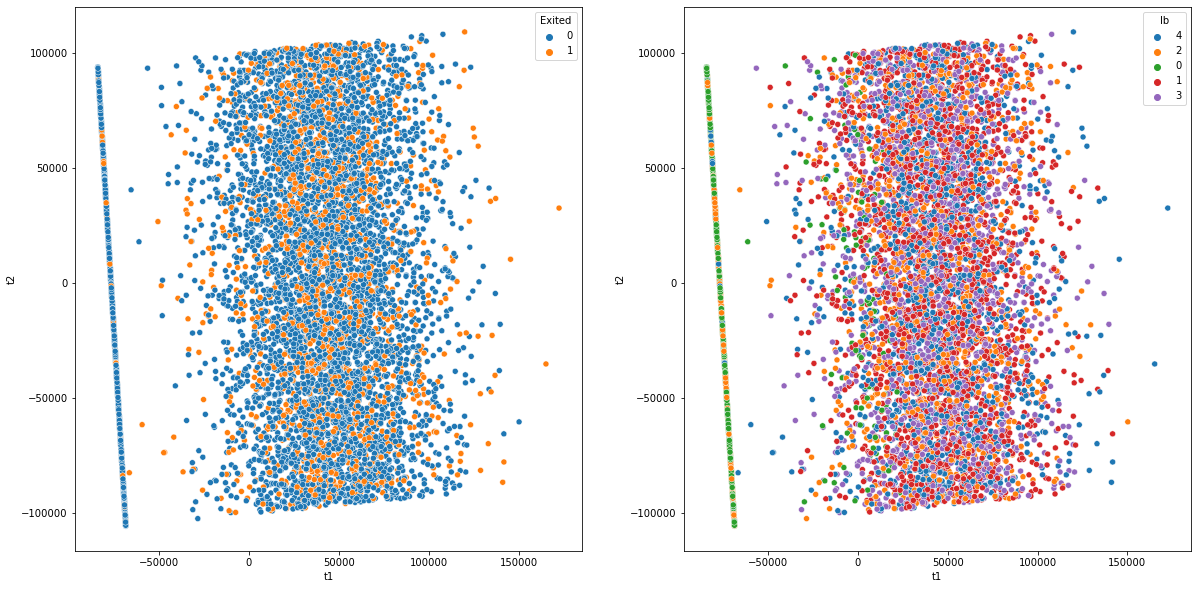

In [46]:
# StandardScaler
# PCA
# KMeans
clustering(dataframe=df)

In [47]:
inertias = [KMeans(k).fit(StandardScaler().fit_transform(df)).inertia_ for k in range(2,10)]
inertias

[110313.36167002862,
 100281.35330035747,
 92372.74484219574,
 86749.93500509723,
 83879.81514161779,
 81232.60656961177,
 79581.80076221554,
 76409.01986609252]

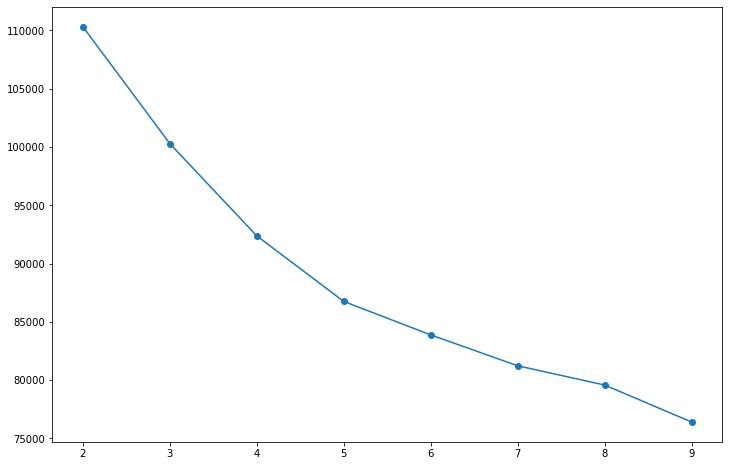

In [48]:
plt.plot(range(2,10), inertias, marker='o')

In [49]:
# StandardScaler
# PCA
# KMeans con 8 k
# clustering(dataframe=df, modelo_clust=KMeans(8, random_state=42))

In [50]:
# StandardScaler
# TSNE
# KMeans
# clustering(dataframe=df, modelo_red=TSNE())

In [51]:
# StandardScaler
# TSNE
# KMeans = 8 k
# clustering(dataframe=df, modelo_red=TSNE(), modelo_clust=KMeans(8, random_state=42))

In [52]:
# StandardScaler
# PCA
# DBSCAN

In [53]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited,Labels
0,619,42,2,0.00,1,1,1,101348.88,0,0,0,1,4
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,2
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0,1,4
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,2


In [54]:
X_clus = df.drop('Exited', axis=1)

In [55]:
logregscaled_resampled(X_clus,y,test_size=0.3, scaler=StandardScaler(), resampler=BorderlineSMOTE())

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2426
           1       1.00      0.95      0.97      2352

    accuracy                           0.98      4778
   macro avg       0.98      0.97      0.98      4778
weighted avg       0.98      0.98      0.98      4778



# Clasificadores

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
# Ampliamos otra vez nuestra función para poder seleccionar el clasificador

def logregscaled_resampled_classif(X,y,test_size=0.3,classif=LogisticRegression(), scaler=StandardScaler(), resampler=BorderlineSMOTE()):
    """
    Ejecuta un modelo eligiendo el clasificador, el escalador y el resampler
    a partir de una X y una variable objetivo y.
    Se le puede inputar el test_size, que inicialmente será 0.3
    Imprime la classification report.
    """
    resampling_method = resampler
    X_res, y_res = resampling_method.fit_resample(X,y)
    
    model = scaler
    X_scaled = model.fit_transform(X_res)
    
    X_train, X_test, y_train,y_test = train_test_split(X_scaled, y_res, test_size=test_size, random_state=42)
    
    clas = classif
    clas.fit(X_train, y_train)
    y_pred_test = clas.predict(X_test)
    y_pred_train = clas.predict(X_train)
    
    if classif == DecisionTreeClassifier() or classif == RandomForestClassifier():
        print(clas.feature_importances_)
    
    print(classification_report(y_test, y_pred_test))
    print(classification_report(y_train, y_pred_train))

In [63]:
logregscaled_resampled_classif(X_clus,y)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2426
           1       1.00      0.95      0.97      2352

    accuracy                           0.98      4778
   macro avg       0.98      0.98      0.98      4778
weighted avg       0.98      0.98      0.98      4778

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5537
           1       1.00      0.96      0.98      5611

    accuracy                           0.98     11148
   macro avg       0.98      0.98      0.98     11148
weighted avg       0.98      0.98      0.98     11148



In [64]:
logregscaled_resampled_classif(X_clus,y, classif=DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2426
           1       0.97      0.98      0.98      2352

    accuracy                           0.98      4778
   macro avg       0.98      0.98      0.98      4778
weighted avg       0.98      0.98      0.98      4778

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5537
           1       1.00      1.00      1.00      5611

    accuracy                           1.00     11148
   macro avg       1.00      1.00      1.00     11148
weighted avg       1.00      1.00      1.00     11148



In [65]:
logregscaled_resampled_classif(X,y, classif=RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2426
           1       0.85      0.86      0.86      2352

    accuracy                           0.86      4778
   macro avg       0.86      0.86      0.86      4778
weighted avg       0.86      0.86      0.86      4778

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5537
           1       1.00      1.00      1.00      5611

    accuracy                           1.00     11148
   macro avg       1.00      1.00      1.00     11148
weighted avg       1.00      1.00      1.00     11148



In [66]:
logregscaled_resampled_classif(X_clus,y, classif=RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2426
           1       0.99      0.97      0.98      2352

    accuracy                           0.98      4778
   macro avg       0.98      0.98      0.98      4778
weighted avg       0.98      0.98      0.98      4778

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5537
           1       1.00      1.00      1.00      5611

    accuracy                           1.00     11148
   macro avg       1.00      1.00      1.00     11148
weighted avg       1.00      1.00      1.00     11148



In [67]:
from sklearn.neural_network import MLPClassifier

In [68]:
clf = MLPClassifier(solver='adam',
                    max_iter=1000,
                    alpha=1e-3,
                    activation='relu', 
                    hidden_layer_sizes=(7,7,3))

In [69]:
logregscaled_resampled_classif(X_clus,y, classif=clf)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2426
           1       0.99      0.97      0.98      2352

    accuracy                           0.98      4778
   macro avg       0.98      0.98      0.98      4778
weighted avg       0.98      0.98      0.98      4778

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5537
           1       0.99      0.98      0.99      5611

    accuracy                           0.99     11148
   macro avg       0.99      0.99      0.99     11148
weighted avg       0.99      0.99      0.99     11148



In [70]:
logregscaled_resampled_classif(X,y, classif=clf)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2426
           1       0.83      0.83      0.83      2352

    accuracy                           0.83      4778
   macro avg       0.83      0.83      0.83      4778
weighted avg       0.83      0.83      0.83      4778

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      5537
           1       0.84      0.83      0.83      5611

    accuracy                           0.83     11148
   macro avg       0.83      0.83      0.83     11148
weighted avg       0.83      0.83      0.83     11148



In [71]:
from sklearn.naive_bayes import GaussianNB

In [72]:
logregscaled_resampled_classif(X_clus,y, classif=GaussianNB())

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      2426
           1       0.85      0.90      0.87      2352

    accuracy                           0.87      4778
   macro avg       0.87      0.87      0.87      4778
weighted avg       0.87      0.87      0.87      4778

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      5537
           1       0.86      0.89      0.88      5611

    accuracy                           0.88     11148
   macro avg       0.88      0.87      0.87     11148
weighted avg       0.88      0.88      0.87     11148



In [73]:
logregscaled_resampled_classif(X,y, classif=GaussianNB())

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      2426
           1       0.76      0.80      0.78      2352

    accuracy                           0.78      4778
   macro avg       0.78      0.78      0.78      4778
weighted avg       0.78      0.78      0.78      4778

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      5537
           1       0.77      0.79      0.78      5611

    accuracy                           0.78     11148
   macro avg       0.78      0.78      0.78     11148
weighted avg       0.78      0.78      0.78     11148



In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
help(RandomizedSearchCV)

# Pipeline

In [79]:
from imblearn.pipeline import Pipeline

In [76]:
from sklearn.pipeline import make_pipeline

In [85]:
pipeline = Pipeline(steps=[('b',BorderlineSMOTE())])

In [86]:
X_smote, y_smote = pipeline.fit_resample(X_clus, y)

In [93]:
model = make_pipeline(StandardScaler(), RandomForestClassifier())


In [96]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

In [97]:
model.fit(X_train_p, y_train_p).score(X_test_p, y_test_p)

0.9834658853076601

In [98]:
model.fit(X_train_p, y_train_p).score(X_train_p, y_train_p)

1.0

In [90]:
help(make_pipeline)

Help on function make_pipeline in module sklearn.pipeline:

make_pipeline(*steps, **kwargs)
    Construct a Pipeline from the given estimators.
    
    This is a shorthand for the Pipeline constructor; it does not require, and
    does not permit, naming the estimators. Instead, their names will be set
    to the lowercase of their types automatically.
    
    Parameters
    ----------
    *steps : list of estimators.
    
    memory : str or object with the joblib.Memory interface, default=None
        Used to cache the fitted transformers of the pipeline. By default,
        no caching is performed. If a string is given, it is the path to
        the caching directory. Enabling caching triggers a clone of
        the transformers before fitting. Therefore, the transformer
        instance given to the pipeline cannot be inspected
        directly. Use the attribute ``named_steps`` or ``steps`` to
        inspect estimators within the pipeline. Caching the
        transformers is ad

# Interpretación?

In [99]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited,Labels
0,619,42,2,0.00,1,1,1,101348.88,0,0,0,1,4
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,2
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0,1,4
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,2
